In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
import world_bank_data as wb

pop = pd.DataFrame(wb.get_series('SP.POP.TOTL', mrv=1))
pop = pop.reset_index()

In [3]:
# pop[pop['Country'] == 'Korea, Rep.']
# pd.set_option('display.max_rows', 500)
# display(pop)

In [4]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [5]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [6]:
df = df.groupby('Country/Region').sum()

In [7]:
df = df.T

In [8]:
df = df.drop('Lat')
df = df.drop('Long')

In [9]:
df = df.rename(columns={"US": "United States"}, errors="raise")
df = df.rename(columns={"Korea, South": "Korea, Rep."}, errors="raise")
df.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United States', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=161)

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df.index.name = 'Date'

In [12]:
today = df.iloc[-1]

In [13]:
print(today[(today >= 100) & (today < 1000)].index)
print(today[(today >= 1000) & (today < 10000)].index)
print(today[(today >= 10000)].index)

Index(['Argentina', 'Armenia', 'Australia', 'Bahrain', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Croatia', 'Czechia', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'Greece', 'Iceland', 'India', 'Indonesia', 'Iraq',
       'Ireland', 'Israel', 'Japan', 'Kuwait', 'Latvia', 'Lebanon',
       'Luxembourg', 'Mexico', 'Pakistan', 'Panama', 'Peru', 'Philippines',
       'Poland', 'Qatar', 'Romania', 'Russia', 'San Marino', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa',
       'Taiwan*', 'Thailand', 'Turkey', 'United Arab Emirates'],
      dtype='object', name='Country/Region')
Index(['Austria', 'Belgium', 'Denmark', 'Korea, Rep.', 'Malaysia',
       'Netherlands', 'Norway', 'Portugal', 'Sweden', 'Switzerland',
       'United Kingdom'],
      dtype='object', name='Country/Region')
Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Spain',
       'United States'],
      dtype='object', name='Country/Region')


In [14]:
condition = today[(today > 5000)].index
print(list(condition))

['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, Rep.', 'Spain', 'Switzerland', 'United States']


In [15]:
countries = list(condition)
countries.remove('Iran')
countries.remove('China')
countries.append('Canada')

min_case_num = 500
min_case_pct = 1/100000.
title_name = "countries with cases >5000 excl. China, Iran, incl. Canada"

In [16]:
data = {}
data_original = {}
data_pct = {}

for c in countries:
    data_original[c] = df[c]

    country = df[c]
    country100 = country[country >= min_case_num]
    country100 = country100.reset_index()
    data[c] = country100[c]
    
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    df[c+' (by population)'] = df[c] * 1. / int(size)

    country_pct = df[c+' (by population)']
    country0_00001 = country_pct[country_pct >= min_case_pct]
    country0_00001 = country0_00001.reset_index()
    data_pct[c] = country0_00001[c+' (by population)']

Text(0.5, 0, 'Days after passing 500 confirmed cases')

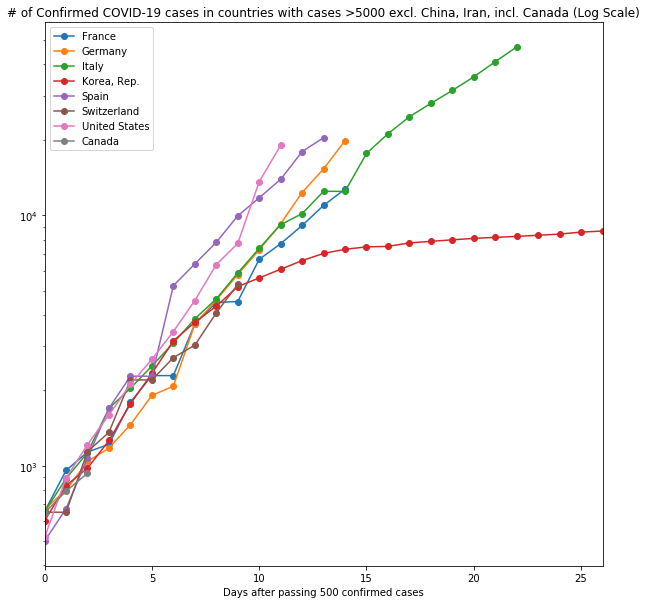

In [17]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

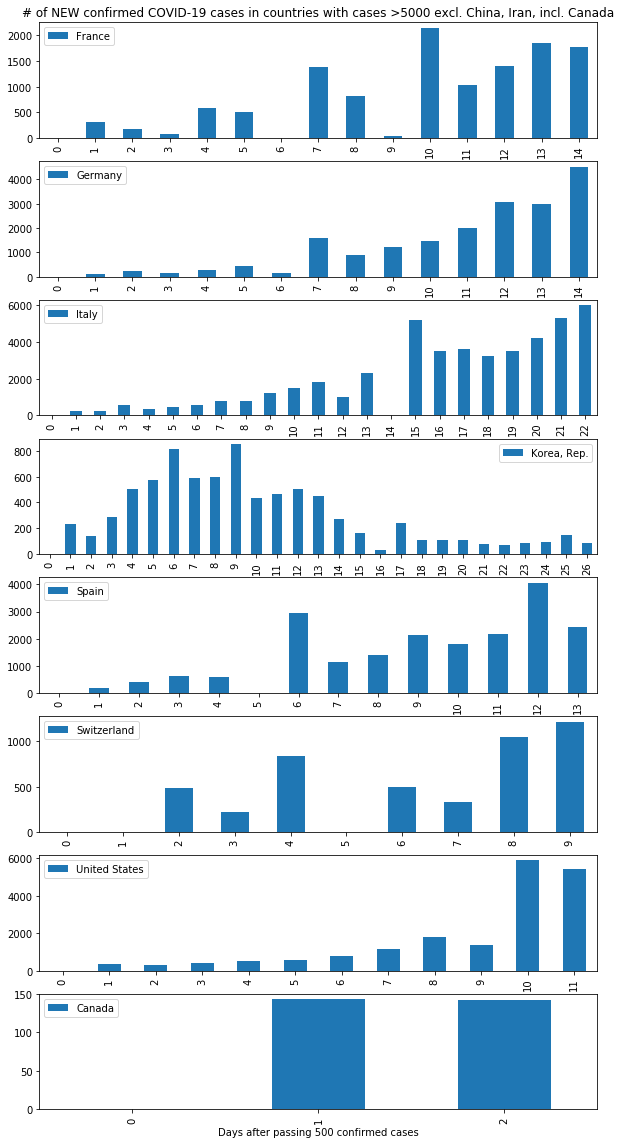

In [18]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

In [19]:
# pd.DataFrame([1,1.2,1.2**3]).pct_change()

In [20]:
for c in data.keys():
    size = pop[pop['Country'] == c]['SP.POP.TOTL']
    growth_rate = data[c].tail(5).pct_change().mean()
    num_cases = data[c].iloc[-1]
    projected_num_cases = int(num_cases*(1+growth_rate)**7)
    
    print(c)
    print('% growth rate:', round(growth_rate * 100, 2),'%')
    print('% Infected (today)', round(num_cases / int(size) * 100, 4), '%')
    print('% Infected (projected in 7 days)', round(projected_num_cases / int(size) * 100, 4), '%')
    print('# Infected (today) / Total Population:', int(num_cases),'/',int(size))
    print('# Infected (projected in 7 days) / Total Population:', int(projected_num_cases),'/',int(size))
    print('--')

France
% growth rate: 17.55 %
% Infected (today) 0.019 %
% Infected (projected in 7 days) 0.0589 %
# Infected (today) / Total Population: 12726 / 66987244
# Infected (projected in 7 days) / Total Population: 39471 / 66987244
--
Germany
% growth rate: 28.57 %
% Infected (today) 0.0239 %
% Infected (projected in 7 days) 0.139 %
# Infected (today) / Total Population: 19848 / 82927922
# Infected (projected in 7 days) / Total Population: 115290 / 82927922
--
Italy
% growth rate: 13.86 %
% Infected (today) 0.0778 %
% Infected (projected in 7 days) 0.193 %
# Infected (today) / Total Population: 47021 / 60431283
# Infected (projected in 7 days) / Total Population: 116659 / 60431283
--
Korea, Rep.
% growth rate: 1.24 %
% Infected (today) 0.0168 %
% Infected (projected in 7 days) 0.0183 %
# Infected (today) / Total Population: 8652 / 51635256
# Infected (projected in 7 days) / Total Population: 9431 / 51635256
--
Spain
% growth rate: 19.83 %
% Infected (today) 0.0437 %
% Infected (projected in 7

In [21]:
# print(data_pct)

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

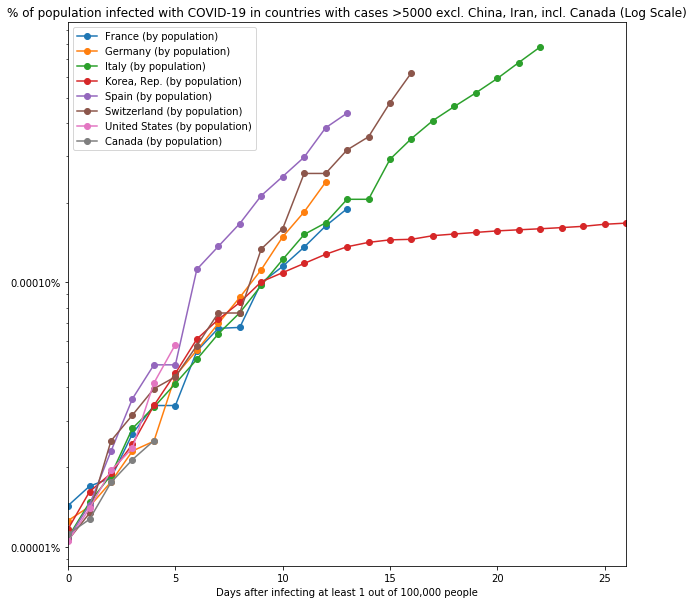

In [22]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data_pct[c].plot(logy=True, marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (Log Scale)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

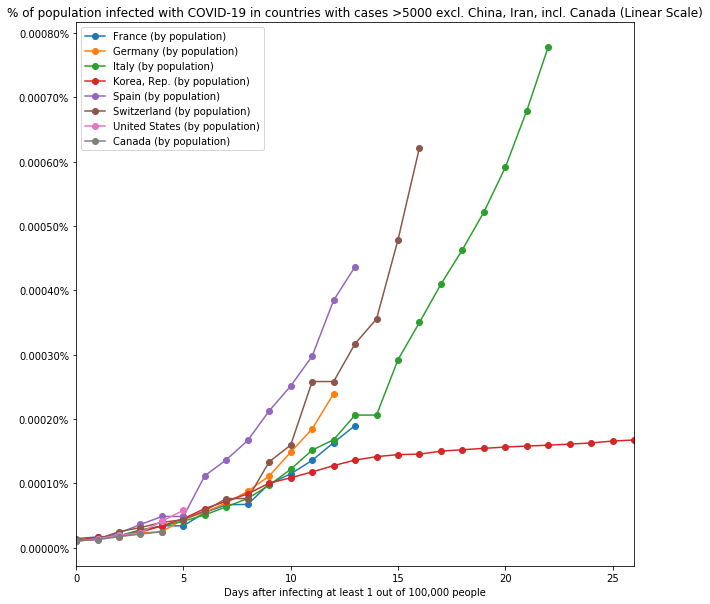

In [23]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data_pct[c].plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("% of population infected with COVID-19 in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after infecting at least 1 out of 100,000 people')

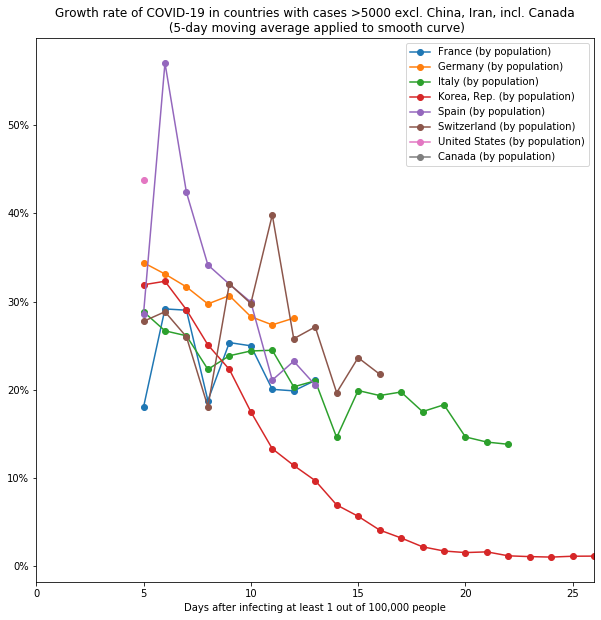

In [24]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    growth_rate = data_pct[c].rolling(window=5).mean().pct_change() * 100.
    growth_rate.plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("Growth rate of COVID-19 in " + title_name + "\n (5-day moving average applied to smooth curve)")
axes.set_xlabel("Days after infecting at least 1 out of 100,000 people")

Text(0.5, 0, 'Days after passing 500 confirmed cases')

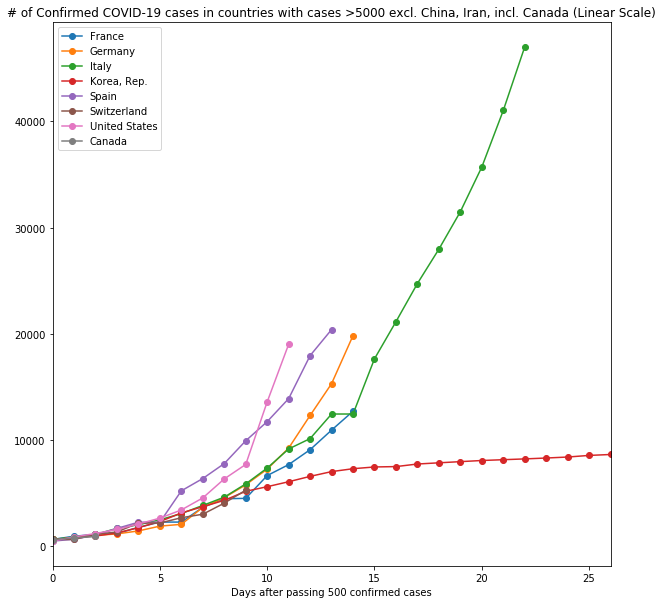

In [25]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    data[c].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Dates')

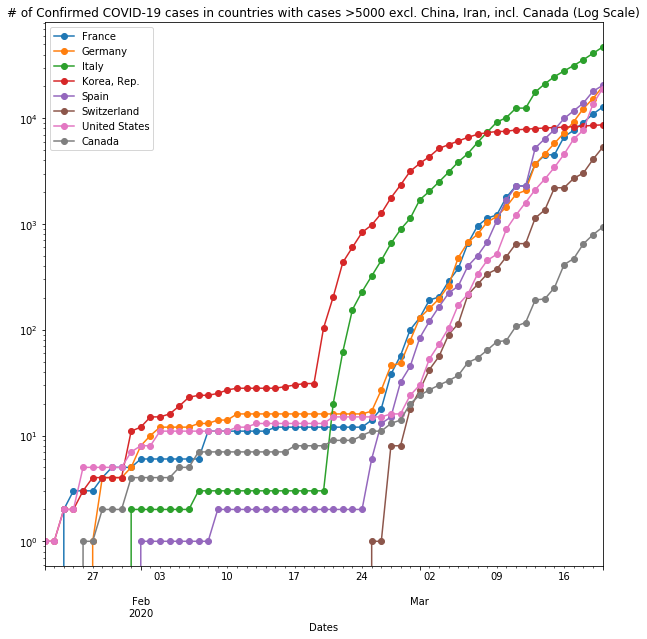

In [26]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

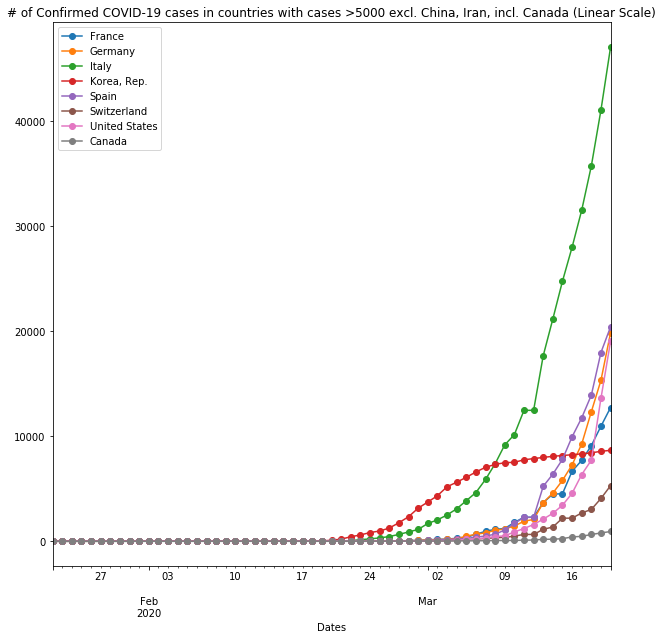

In [27]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in " + title_name + " (Linear Scale)")
axes.set_xlabel("Dates")